<a href="https://colab.research.google.com/github/joaochenriques/Turbomachines_pyBEMT/blob/main/TidalExampleTwist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
import pathlib

if not pathlib.Path("mpl_utils.py").exists():
  os.system( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" )

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']

In [13]:
!pip install git+https://github.com/kegiljarhus/pybemt.git 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kegiljarhus/pybemt.git to /tmp/pip-req-build-_bndffy0
  Running command git clone -q https://github.com/kegiljarhus/pybemt.git /tmp/pip-req-build-_bndffy0


In [14]:
!curl -O https://raw.githubusercontent.com/kegiljarhus/pyBEMT/master/examples/tidal.ini

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   702  100   702    0     0   5616      0 --:--:-- --:--:-- --:--:--  5616


In [17]:
"""
Example on how to use the twist variable to modify the pitch angle globally.
"""

import matplotlib.pyplot as pl
from pybemt.solver import Solver

# Run sweep of tip speed ratio with the BEMT method
s = Solver('tidal.ini')
df, section_df = s.run_sweep('twist', 9, -2, 2)

--- Results ---
Trust (N):	 626.6899038427492
Torque (Nm):	 26.175324429263835
Power (W):	 603.0361841702346
--- Results ---
Trust (N):	 616.1685236833506
Torque (Nm):	 26.477084621707778
Power (W):	 609.9882399309047
--- Results ---
Trust (N):	 604.9893979394311
Torque (Nm):	 26.679253908419632
Power (W):	 614.6458859342846
--- Results ---
Trust (N):	 593.1401601192019
Torque (Nm):	 26.791808440767962
Power (W):	 617.2389562086121
--- Results ---
Trust (N):	 580.4740676157073
Torque (Nm):	 26.817514648756923
Power (W):	 617.831184725857
--- Results ---
Trust (N):	 566.9699573641603
Torque (Nm):	 26.75492657014532
Power (W):	 616.3892589074213
--- Results ---
Trust (N):	 552.6067934954681
Torque (Nm):	 26.604767167953
Power (W):	 612.9298346255925
--- Results ---
Trust (N):	 537.5360653244248
Torque (Nm):	 26.37193896741215
Power (W):	 607.565857953563
--- Results ---
Trust (N):	 521.8959271747478
Torque (Nm):	 26.067913375627768
Power (W):	 600.5616111387736


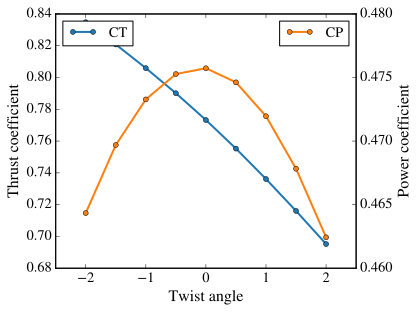

In [16]:
# Plot results
df.plot(x='twist', y='CT', style='C0-o', linewidth=2) 
pl.legend(loc='upper left')
ax = pl.gca()

ax2 = ax.twinx()
df.plot(x='twist', y='CP', style='C1-o', linewidth=2, ax = ax2) 
ax2.axis((-2.5,2.5,0.46,0.48))
pl.legend(loc='upper right')
ax.set_xlabel('Twist angle')
ax.set_ylabel('Thrust coefficient')
ax2.set_ylabel('Power coefficient')
pl.tight_layout()